# STA 130 Lab 4 - The Binomial Distribution
*Your Name Here*

## Lucky Dice

The game of Lucky Dice is played with three dice.  Each person picks an integer 1 to 6, and
bets one fake dollar.  The house (your TA) rolls the three dice, and your payoff is based on
how many times your number is matched on the dice.  For zero matches, the house keeps the
dollar.  For exactly one match, you get your dollar back plus another dollar.  For exactly two
matches, you get your dollar back plus two dollars profit, and for all three matches, you get
your dollar plus three dollars profit.

Your whole lab section will now play a round of lucky dice.  Everyone pick an integer
from the set 1, 2, 3, 4, 5, 6.  What is the theoretical probability of exactly one die matching
your particular chosen number?

<span style="color:red">
${3 \choose 1}\left(\frac{1}{6}\right)\left(1 - \frac{1}{6}\right)^2$

Your  TA  will  roll  the  three  dice  and  announce  the  numbers.   Count  your  number  of
matches.  

Let $X =$ number of matches and $Y =$ profit per game.  Theoretically, what is the distribution of $X$ ?  What are the parameter values?

<span style="color:red">
$X \sim Binom(n = 3 , p = \frac{1}{6})$
where $n$ is the number of trials and $p$ is the probability of success in a given trial. 

The matches from the whole class will be tallied up for the following individual
work.  Start by completing this table:

x  | y  | Frequency | Relative frequency
-- | --: | --------- | ------------------
0  | -1  |           |
1  |  1  |           |
2  |  2  |           |
3  |  3  |           |

Let $m$ be the match data for the whole class (a vector of 0’s, 1’s, 2’s, and 3’s), and $p$ be
the corresponding profits.  Calculate the following, and explain what each means in words:

1) $\bar{m} =$

2) $s_m =$

3) $\bar{p} = $

4) $s_p = $

## Theoretical distribution

Build  the  theoretical  PMF  chart  for X and Y based  upon  your  answer  to  the  very  first question. Do the outcomes sum to 1.0? Should they?

$x$  | $y$  | $p(x)$
--- | ---: | ------------------ 
0  |  -1  |           
1  |   1  |           
2  |   2  |           
3  |   3  |           


Construct a graphical representation of this PMF

In [24]:
import numpy as np
import seaborn as sns
import pandas as pd

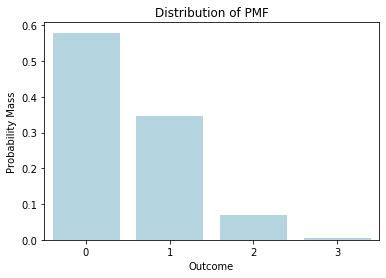

In [102]:
theoretical_pmf = pd.DataFrame(index = [0,1,2,3],
                               data = {"Density":[0.579, 0.347, 0.069, 0.005]}
                              )
sns.barplot(x = theoretical_pmf.index.values, y = theoretical_pmf["Density"], color = "lightblue")
plt.title("Distribution of PMF")
plt.xlabel("Outcome")
plt.ylabel("Probability Mass")
pass

In [12]:
import numpy as np
import scipy.stats as stats

In [17]:
stats.binom.pmf(k = 1, n = 3, p= 1/6)

0.34722222222222215

Using the moments of this distribution, calculate the following, and explain what each
means in words:

1) $\mu_x = $

2) $\sigma_x = $

3) $\mu_y = $

4) $\sigma_y = $

## Discussion

Briefly discuss the following:

1.  Describe three ways that the theoretical and sample distributions and/or graphs are similar.

2.  Describe three significant differences between the theoretical and sample distributions and/or graphs.

3.  Does it appear that the data follow the theoretical distribution?  Why or why not?

4.  Suppose we repeat this “experiment” 1000 times (that is,  play 1000 games of lucky dice and record the matches).  Which table (the data or theoretical) would change? Why?  How would it change?

## Simulate Lucky Dice

Write a quick code chunk to simulate 1000 games of Lucky Dice and record the matches.
Plot the histogram of these 1000 match values.  Does it match
your expected changes from this last question?

In [46]:
# using the theoretical probability of each outcome
np.random.seed(12)
lucky_dice = np.random.multinomial(1000, 
                                   (scipy.special.comb(3,0)*(1-1/6)**3,
                                    scipy.special.comb(3,1)*(1/6)*(5/6)**2, 
                                    scipy.special.comb(3,2)*(5/6)*(1/6)**2, 
                                    scipy.special.comb(3,3)*(1/6)**3
                                   )
                                  )

In [47]:
outcome_table = np.array([[0,1,2,3],lucky_dice]).T
outcome_table

array([[  0, 595],
       [  1, 334],
       [  2,  70],
       [  3,   1]])

In [59]:
outcome_prop = pd.DataFrame(index = outcome_table[:,0], 
                            data = outcome_table[:,1]/np.sum(outcome_table[:,1]),
                            columns = ["Empirical Prob"]
                           )
outcome_prop

,Empirical Prob
0,0.595
1,0.334
2,0.070
3,0.001


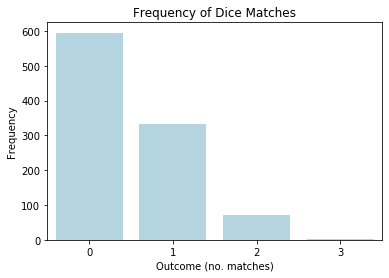

In [48]:
sns.barplot(x = outcome_table[:,0], y = outcome_table[:,1], color = "lightblue")
plt.title("Frequency of Dice Matches")
plt.xlabel("Outcome (no. matches)")
plt.ylabel("Frequency")
pass

## Finding the variance empirically

In class, we derived the expectation by hand, but did not discuss how to calculate the variance. We can use Monte Carlo methods to estimate the variance. Write a simulation to estimate the variance of the random variable Y from Lucky Dice.

- First, generate a large number of values (random draws)  from  the  distribution  of $Y$,  then  calculate  the  corresponding $y$ for  each  of  these values, and finally calculate the observed variance of $Y$.  
- Similarly, you can get estimates for  the  expectation $E[Y]$ by calculating the observed mean. 
- Write  a  properly formatted function (readable with docstring and comments)  to  calculate the empirical mean and variance. Run the simulation for different  numbers  of random draws (e.g. 100, 1000, 10000, 100000). Describe your findings.

In [87]:
def lucky_sim(n_sim):
    """
    This function calculates the empirical mean and variance of Y for a simulated game of 
    n_sim draws of lucky dice.
    Y is defined as the profit per game played.
    """
    
    # set random seed for reproducibiliy
    np.random.seed(12)
    
    # draw samples
    lucky_dice = np.random.multinomial(n_sim, 
                                       (scipy.special.comb(3,0)*(1-1/6)**3,
                                        scipy.special.comb(3,1)*(1/6)*(5/6)**2, 
                                        scipy.special.comb(3,2)*(5/6)*(1/6)**2, 
                                        scipy.special.comb(3,3)*(1/6)**3
                                       )
                                      )
    # payout and frequency of each payout
    outcome_table = np.array([[-1,1,2,3],lucky_dice]).T
    
    # compute expectation
    emp_mean = np.sum(outcome_table[:,0]*outcome_table[:,1])/np.sum(outcome_table[:,1])
    
    # compute variance
    emp_var = np.sum((outcome_table[:,0]**2)*outcome_table[:,1])/np.sum(outcome_table[:,1]) - emp_mean**2
    # return results
    return {"Empirical Mean":np.round(emp_mean,3), "Empirical Var":np.round(emp_var,3)}

In [88]:
lucky_sim(100)

{'Empirical Mean': -0.17, 'Empirical Var': 1.121}

In [89]:
for sim_size in [10**2, 10**3, 10**4, 10**6]:
    # run simulation
    result = lucky_sim(sim_size)
    print(sim_size, result)

100 {'Empirical Mean': -0.17, 'Empirical Var': 1.121}
1000 {'Empirical Mean': -0.118, 'Empirical Var': 1.204}
10000 {'Empirical Mean': -0.093, 'Empirical Var': 1.227}
1000000 {'Empirical Mean': -0.08, 'Empirical Var': 1.238}


In [ ]:
stats.mu